# Зависимости

In [52]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# EDA

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv").drop('id', axis=1)
test = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv").drop('id', axis=1)
train

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [3]:
test

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
125685,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [5]:
train.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [6]:
train.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [7]:
test.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [8]:
train['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [9]:
test['fuel_type'].value_counts()

fuel_type
Gasoline          110533
Hybrid              4676
E85 Flex Fuel       3523
Diesel              2686
–                    538
Plug-In Hybrid       337
not supported         14
Name: count, dtype: int64

In [10]:
train['accident'].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [11]:
test['accident'].value_counts()

accident
None reported                             96263
At least 1 accident or damage reported    27795
Name: count, dtype: int64

In [12]:
train['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [13]:
test['clean_title'].value_counts()

clean_title
Yes    111451
Name: count, dtype: int64

In [14]:
train.drop('clean_title', axis=1, inplace=True)
test.drop('clean_title', axis=1, inplace=True)

In [15]:
train['accident'] = train['accident'].fillna(train['accident'].mode()[0])
train['fuel_type'] = train['fuel_type'].fillna(train['fuel_type'].mode()[0])
train.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
dtype: int64

In [16]:
test['accident'] = test['accident'].fillna(test['accident'].mode()[0])
test['fuel_type'] = test['fuel_type'].fillna(test['fuel_type'].mode()[0])
test.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
dtype: int64

In [17]:
sc = StandardScaler()

numerical_df = train.select_dtypes(include='int64').drop('price', axis=1)
columns = numerical_df.columns
for col in columns:
    train[col] = sc.fit_transform(train[[col]])
    test[col] = sc.transform(test[[col]])
train

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,MINI,Cooper S Base,-1.559808,2.957842,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200
1,Lincoln,LS V8,-2.443052,1.557184,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,-2.443052,1.426276,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,Genesis,G90 5.0 Ultimate,0.206679,-0.927854,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,Mercedes-Benz,Metris Base,0.913274,-1.171076,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500
...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,0.206679,-0.335461,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,0.383328,-0.745116,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,0.913274,-1.045328,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,86900
188531,Audi,S5 3.0T Prestige,1.089923,-1.040409,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,84900


In [18]:
train.describe()

,model_year,milage,price
count,1.885330e+05,1.885330e+05,1.885330e+05
mean,1.872214e-14,8.149083e-17,4.387802e+04
std,1.000003e+00,1.000003e+00,7.881952e+04
min,-7.389216e+00,-1.317428e+00,2.000000e+03
25%,-4.999155e-01,-8.351796e-01,1.700000e+04
50%,2.066794e-01,-1.590484e-01,3.082500e+04
75%,7.366255e-01,5.963028e-01,4.990000e+04
max,1.443220e+00,6.813417e+00,2.954083e+06


In [19]:
test.describe()

,model_year,milage
count,125690.000000,125690.000000
mean,-0.005736,0.006773
std,1.002269,1.008551
min,-7.389216,-1.317428
25%,-0.499916,-0.827448
50%,0.206679,-0.164771
75%,0.736626,0.604295
max,1.443220,6.813417


In [20]:
def extract_age_features(df):
    current_year = 2024
    df['Vehicle_Age'] = current_year - df['model_year']
    # Avoid division by zero
    df['Vehicle_Age'] = df['Vehicle_Age'].replace(0, 1)
    df['Mileage_per_Year'] = df['milage'] / df['Vehicle_Age']
    df['milage_with_age'] = df.groupby('Vehicle_Age')['milage'].transform('mean')
    df['Mileage_per_Year_with_age'] = df.groupby('Vehicle_Age')['Mileage_per_Year'].transform('mean')
    return df

def extract_other_features(df):
    luxury_brands = [
        'Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land', 'Lexus', 'Jaguar',
        'Bentley', 'Maserati', 'Lamborghini', 'Rolls-Royce', 'Ferrari',
        'McLaren', 'Aston', 'Maybach'
    ]
    df['Is_Luxury_Brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    return df

In [21]:
train = extract_age_features(train)
test = extract_age_features(test)

train = extract_other_features(train)
test = extract_other_features(test)
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,Vehicle_Age,Mileage_per_Year,milage_with_age,Mileage_per_Year_with_age,Is_Luxury_Brand
0,MINI,Cooper S Base,-1.559808,2.957842,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200,2025.559808,0.001460,1.060492,0.000524,0
1,Lincoln,LS V8,-2.443052,1.557184,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999,2026.443052,0.000768,1.059589,0.000523,0
2,Chevrolet,Silverado 2500 LT,-2.443052,1.426276,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900,2026.443052,0.000704,1.059589,0.000523,0
3,Genesis,G90 5.0 Ultimate,0.206679,-0.927854,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000,2023.793321,-0.000458,0.044889,0.000022,0
4,Mercedes-Benz,Metris Base,0.913274,-1.171076,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500,2023.086726,-0.000579,-0.730134,-0.000361,1


In [22]:
test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,Vehicle_Age,Mileage_per_Year,milage_with_age,Mileage_per_Year_with_age,Is_Luxury_Brand
0,Land,Rover LR2 Base,-0.146618,0.648514,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,2024.146618,0.000320,0.308711,0.000153,1
1,Land,Rover Defender SE,0.736626,-1.135854,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,2023.263374,-0.000561,-0.631479,-0.000312,1
2,Ford,Expedition Limited,1.089923,-0.754735,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,2022.910077,-0.000373,-0.960445,-0.000475,0
3,Audi,A6 2.0T Sport,0.030031,-0.089307,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,2023.969969,-0.000044,0.206723,0.000102,1
4,Audi,A6 2.0T Premium Plus,0.383328,-0.134650,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,2023.616672,-0.000067,-0.273098,-0.000135,1


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   brand                      188533 non-null  object 
 1   model                      188533 non-null  object 
 2   model_year                 188533 non-null  float64
 3   milage                     188533 non-null  float64
 4   fuel_type                  188533 non-null  object 
 5   engine                     188533 non-null  object 
 6   transmission               188533 non-null  object 
 7   ext_col                    188533 non-null  object 
 8   int_col                    188533 non-null  object 
 9   accident                   188533 non-null  object 
 10  price                      188533 non-null  int64  
 11  Vehicle_Age                188533 non-null  float64
 12  Mileage_per_Year           188533 non-null  float64
 13  milage_with_age            18

In [24]:
def update(df):
    threshold = 100
#     categorical_columns = [
#         'brand', 'model', 'fuel_type', 'engine',
#         'transmission', 'ext_col', 'int_col', 'accident'
#     ]
    rare_columns = ['model', 'engine', 'transmission', 'ext_col', 'int_col']
    
    for col in rare_columns:
        freq = df[col].value_counts()
        df[col] = df[col].apply(lambda x: x if freq[x] >= threshold else 'noise')
    
#     for col in categorical_columns:
#         df[col] = df[col].fillna('missing')
#         df[col] = df[col].astype('category')
    
    return df

In [25]:
train = update(train)
test = update(test)
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,Vehicle_Age,Mileage_per_Year,milage_with_age,Mileage_per_Year_with_age,Is_Luxury_Brand
0,MINI,Cooper S Base,-1.559808,2.957842,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200,2025.559808,0.001460,1.060492,0.000524,0
1,Lincoln,noise,-2.443052,1.557184,Gasoline,noise,A/T,Silver,Beige,At least 1 accident or damage reported,4999,2026.443052,0.000768,1.059589,0.000523,0
2,Chevrolet,noise,-2.443052,1.426276,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900,2026.443052,0.000704,1.059589,0.000523,0
3,Genesis,noise,0.206679,-0.927854,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000,2023.793321,-0.000458,0.044889,0.000022,0
4,Mercedes-Benz,Metris Base,0.913274,-1.171076,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500,2023.086726,-0.000579,-0.730134,-0.000361,1


In [29]:
# cat_df = train.select_dtypes('object')
# cat_cols = cat_df.columns
# for col in cat_cols:
#     print(col, " - ", len(train[col].unique()))
#     print(train[col].unique(), '\n')

In [27]:
train['accident'] = train['accident'].map({'None reported': False, 'At least 1 accident or damage reported': True})
train['Is_Luxury_Brand'] = train['Is_Luxury_Brand'].map({0: False, 1: True})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   brand                      188533 non-null  object 
 1   model                      188533 non-null  object 
 2   model_year                 188533 non-null  float64
 3   milage                     188533 non-null  float64
 4   fuel_type                  188533 non-null  object 
 5   engine                     188533 non-null  object 
 6   transmission               188533 non-null  object 
 7   ext_col                    188533 non-null  object 
 8   int_col                    188533 non-null  object 
 9   accident                   188533 non-null  bool   
 10  price                      188533 non-null  int64  
 11  Vehicle_Age                188533 non-null  float64
 12  Mileage_per_Year           188533 non-null  float64
 13  milage_with_age            18

In [28]:
test['accident'] = test['accident'].map({'None reported': False, 'At least 1 accident or damage reported': True})
test['Is_Luxury_Brand'] = test['Is_Luxury_Brand'].map({0: False, 1: True})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   brand                      125690 non-null  object 
 1   model                      125690 non-null  object 
 2   model_year                 125690 non-null  float64
 3   milage                     125690 non-null  float64
 4   fuel_type                  125690 non-null  object 
 5   engine                     125690 non-null  object 
 6   transmission               125690 non-null  object 
 7   ext_col                    125690 non-null  object 
 8   int_col                    125690 non-null  object 
 9   accident                   125690 non-null  bool   
 10  Vehicle_Age                125690 non-null  float64
 11  Mileage_per_Year           125690 non-null  float64
 12  milage_with_age            125690 non-null  float64
 13  Mileage_per_Year_with_age  12

In [30]:
sorted(train['fuel_type'].unique()) == sorted(test['fuel_type'].unique())

True

In [31]:
y_train = train['price']
X_train = train.drop('price', axis=1)

In [32]:
ct = ColumnTransformer(
    [('cat', OneHotEncoder(), ['fuel_type']),
    ('others', 'passthrough', X_train.drop('fuel_type', axis=1).columns)])

train_encoded = ct.fit_transform(X_train)
test_encoded = ct.transform(test)
train_encoded

array([[0.0, 0.0, 1.0, ..., 1.0604920509119637, 0.0005235550423088932,
        False],
       [0.0, 0.0, 1.0, ..., 1.0595887143497422, 0.0005228810716218273,
        False],
       [0.0, 1.0, 0.0, ..., 1.0595887143497422, 0.0005228810716218273,
        False],
       ...,
       [0.0, 0.0, 1.0, ..., -0.73013443925881, -0.0003609012060502281,
        True],
       [0.0, 0.0, 1.0, ..., -0.9615063803190864, -0.0004753085128452305,
        True],
       [0.0, 0.0, 1.0, ..., 0.20989637582863604, 0.00010370528170233003,
        True]], dtype=object)

In [33]:
df_train_encoded = pd.DataFrame(train_encoded, columns=ct.get_feature_names_out())
df_test_encoded = pd.DataFrame(test_encoded, columns=ct.get_feature_names_out())

In [34]:
for col in df_train_encoded.columns:
    if col.startswith('cat__'):
        df_train_encoded[col] = df_train_encoded[col].astype('bool')
        df_test_encoded[col] = df_test_encoded[col].astype('bool')
    else:
        original_type = X_train[col.split('__')[1]].dtype
        df_train_encoded[col] = df_train_encoded[col].astype(original_type)
        df_test_encoded[col] = df_test_encoded[col].astype(original_type)


In [35]:
df_train_encoded['price'] = y_train
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   cat__fuel_type_Diesel              188533 non-null  bool   
 1   cat__fuel_type_E85 Flex Fuel       188533 non-null  bool   
 2   cat__fuel_type_Gasoline            188533 non-null  bool   
 3   cat__fuel_type_Hybrid              188533 non-null  bool   
 4   cat__fuel_type_Plug-In Hybrid      188533 non-null  bool   
 5   cat__fuel_type_not supported       188533 non-null  bool   
 6   cat__fuel_type_–                   188533 non-null  bool   
 7   others__brand                      188533 non-null  object 
 8   others__model                      188533 non-null  object 
 9   others__model_year                 188533 non-null  float64
 10  others__milage                     188533 non-null  float64
 11  others__engine                     1885

In [36]:
new_column_names = {col: col.replace('cat__', '').replace('others__', '') for col in df_train_encoded.columns}

df_train_encoded.rename(columns=new_column_names, inplace=True)
df_test_encoded.rename(columns=new_column_names, inplace=True)
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fuel_type_Diesel           188533 non-null  bool   
 1   fuel_type_E85 Flex Fuel    188533 non-null  bool   
 2   fuel_type_Gasoline         188533 non-null  bool   
 3   fuel_type_Hybrid           188533 non-null  bool   
 4   fuel_type_Plug-In Hybrid   188533 non-null  bool   
 5   fuel_type_not supported    188533 non-null  bool   
 6   fuel_type_–                188533 non-null  bool   
 7   brand                      188533 non-null  object 
 8   model                      188533 non-null  object 
 9   model_year                 188533 non-null  float64
 10  milage                     188533 non-null  float64
 11  engine                     188533 non-null  object 
 12  transmission               188533 non-null  object 
 13  ext_col                    18

In [37]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fuel_type_Diesel           125690 non-null  bool   
 1   fuel_type_E85 Flex Fuel    125690 non-null  bool   
 2   fuel_type_Gasoline         125690 non-null  bool   
 3   fuel_type_Hybrid           125690 non-null  bool   
 4   fuel_type_Plug-In Hybrid   125690 non-null  bool   
 5   fuel_type_not supported    125690 non-null  bool   
 6   fuel_type_–                125690 non-null  bool   
 7   brand                      125690 non-null  object 
 8   model                      125690 non-null  object 
 9   model_year                 125690 non-null  float64
 10  milage                     125690 non-null  float64
 11  engine                     125690 non-null  object 
 12  transmission               125690 non-null  object 
 13  ext_col                    12

In [38]:
cat_df = df_train_encoded.select_dtypes('object')
for col in cat_df.columns:
    print(col, set(df_test_encoded[col].unique()).issubset(set(df_train_encoded[col].unique())))

brand True
model True
engine True
transmission True
ext_col True
int_col True


In [39]:
oe = OrdinalEncoder()

df_train_full_encoded = df_train_encoded.copy()
df_test_full_encoded = df_test_encoded.copy()

for col in cat_df.columns:
    df_train_full_encoded[col] = oe.fit_transform(df_train_encoded[[col]])
    
#     if col == 'engine' or col == 'model':  # Check col for test is not subset train (last cell)
#         unique_train = set(df_train_encoded[col].unique())
#         most_frequent_value = df_train_encoded[col].mode()[0]
#         df_test_encoded[col] = df_test_encoded[col].apply(lambda x: most_frequent_value if x not in unique_train else x)
        
    df_test_full_encoded[col] = oe.transform(df_test_encoded[[col]])
    
df_train_full_encoded

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,brand,model,model_year,...,transmission,ext_col,int_col,accident,Vehicle_Age,Mileage_per_Year,milage_with_age,Mileage_per_Year_with_age,Is_Luxury_Brand,price
0,False,False,True,False,False,False,False,31.0,138.0,-1.559808,...,23.0,57.0,14.0,False,2025.559808,0.001460,1.060492,0.000524,False,4200
1,False,False,True,False,False,False,False,28.0,480.0,-2.443052,...,23.0,49.0,0.0,True,2026.443052,0.000768,1.059589,0.000523,False,4999
2,False,True,False,False,False,False,False,9.0,480.0,-2.443052,...,23.0,10.0,14.0,False,2026.443052,0.000704,1.059589,0.000523,False,13900
3,False,False,True,False,False,False,False,16.0,480.0,0.206679,...,29.0,5.0,1.0,False,2023.793321,-0.000458,0.044889,0.000022,False,45000
4,False,False,True,False,False,False,False,36.0,293.0,0.913274,...,13.0,5.0,0.0,False,2023.086726,-0.000579,-0.730134,-0.000361,True,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,False,False,True,False,False,False,False,8.0,166.0,0.206679,...,29.0,56.0,0.0,False,2023.793321,-0.000166,0.044889,0.000022,False,27500
188529,False,False,True,False,False,False,False,36.0,63.0,0.383328,...,18.0,56.0,1.0,True,2023.616672,-0.000368,-0.280678,-0.000139,True,30000
188530,False,False,True,False,False,False,False,36.0,480.0,0.913274,...,13.0,56.0,1.0,False,2023.086726,-0.000517,-0.730134,-0.000361,True,86900
188531,False,False,True,False,False,False,False,3.0,394.0,1.089923,...,1.0,18.0,1.0,False,2022.910077,-0.000514,-0.961506,-0.000475,True,84900


In [40]:
df_test_full_encoded

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,brand,model,model_year,...,engine,transmission,ext_col,int_col,accident,Vehicle_Age,Mileage_per_Year,milage_with_age,Mileage_per_Year_with_age,Is_Luxury_Brand
0,False,False,True,False,False,False,False,26.0,480.0,-0.146618,...,85.0,8.0,56.0,0.0,False,2024.146618,0.000320,0.308711,0.000153,True
1,False,False,False,True,False,False,False,26.0,358.0,0.736626,...,275.0,18.0,49.0,1.0,False,2023.263374,-0.000561,-0.631479,-0.000312,True
2,False,False,True,False,False,False,False,14.0,178.0,1.089923,...,164.0,3.0,56.0,10.0,False,2022.910077,-0.000373,-0.960445,-0.000475,False
3,False,False,True,False,False,False,False,3.0,480.0,0.030031,...,43.0,24.0,59.0,1.0,False,2023.969969,-0.000044,0.206723,0.000102,True
4,False,False,True,False,False,False,False,3.0,56.0,0.383328,...,100.0,23.0,30.0,1.0,False,2023.616672,-0.000067,-0.273098,-0.000135,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,False,False,True,False,False,False,False,36.0,217.0,-0.323267,...,251.0,13.0,5.0,1.0,False,2024.323267,0.000175,0.438107,0.000216,True
125686,False,False,True,False,False,False,False,3.0,332.0,0.559977,...,153.0,24.0,56.0,1.0,False,2023.440023,-0.000361,-0.396123,-0.000196,True
125687,False,False,True,False,False,False,False,3.0,57.0,-0.676564,...,224.0,23.0,5.0,1.0,False,2024.676564,0.000118,0.779877,0.000385,True
125688,False,False,True,False,False,False,False,3.0,480.0,-0.676564,...,224.0,23.0,5.0,1.0,False,2024.676564,0.000459,0.779877,0.000385,True


# Models

In [41]:
models = []
data = []

## Base models

In [48]:
def train_models(data, models, test_size=0.25, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=test_size, random_state=random_state)

    model_fitted = {}

    for i, model in enumerate(models):
        model.random_state = random_state
        print(i, model)
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('RMSE:', mean_squared_error(y_pred, y_test, squared=False))
        print('Time:', time.time() - start, '\n')

        model_fitted[str(model)] = model

    return model_fitted

In [49]:
models_base = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(n_neighbors=3),
    KNeighborsRegressor(n_neighbors=5),
    KNeighborsRegressor(n_neighbors=7),
    DecisionTreeRegressor(max_depth=3),
    DecisionTreeRegressor(max_depth=3, criterion='friedman_mse'),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=7),
    DecisionTreeRegressor(max_depth=7, criterion='friedman_mse'),
    RandomForestRegressor(n_estimators=10),
    RandomForestRegressor(n_estimators=50),
    RandomForestRegressor(n_estimators=50, criterion='friedman_mse'),
    RandomForestRegressor(n_estimators=100)
]

In [50]:
model_fitted = train_models(df_train_full_encoded, models_base)

0 LinearRegression()
RMSE: 67215.65622206777
Time: 0.18480801582336426 

1 Ridge(random_state=42)
RMSE: 67418.61993899704
Time: 0.05775141716003418 

2 Lasso(random_state=42)
RMSE: 67418.59478821335
Time: 6.293718576431274 

3 KNeighborsRegressor(n_neighbors=3)
RMSE: 80632.3484221596
Time: 35.65843486785889 

4 KNeighborsRegressor()
RMSE: 75077.44719891064
Time: 35.05745768547058 

5 KNeighborsRegressor(n_neighbors=7)
RMSE: 72548.29556175637
Time: 35.243064165115356 

6 DecisionTreeRegressor(max_depth=3, random_state=42)
RMSE: 67130.54551046544
Time: 0.27626776695251465 

7 DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=42)
RMSE: 67130.54551046544
Time: 0.2780570983886719 

8 DecisionTreeRegressor(max_depth=5, random_state=42)
RMSE: 66601.61083370016
Time: 0.473940372467041 

9 DecisionTreeRegressor(max_depth=7, random_state=42)
RMSE: 69769.23254654749
Time: 0.6328251361846924 

10 DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, random_state=42)


[Text(0.5, 0.875, 'x[17] <= -0.0\nfriedman_mse = 6555827213.764\nsamples = 141399\nvalue = 43997.03'),
 Text(0.25, 0.625, 'x[11] <= 256.5\nfriedman_mse = 12091662885.133\nsamples = 47470\nvalue = 75157.712'),
 Text(0.125, 0.375, 'x[10] <= -1.122\nfriedman_mse = 7988326550.966\nsamples = 18467\nvalue = 58281.89'),
 Text(0.0625, 0.125, 'friedman_mse = 14376240911.907\nsamples = 4548\nvalue = 73933.546'),
 Text(0.1875, 0.125, 'friedman_mse = 5794891582.154\nsamples = 13919\nvalue = 53167.749'),
 Text(0.375, 0.375, 'x[20] <= 0.5\nfriedman_mse = 14407571813.557\nsamples = 29003\nvalue = 85903.008'),
 Text(0.3125, 0.125, 'friedman_mse = 9928848827.828\nsamples = 13567\nvalue = 69934.022'),
 Text(0.4375, 0.125, 'friedman_mse = 17922882539.786\nsamples = 15436\nvalue = 99938.46'),
 Text(0.75, 0.625, 'x[10] <= 0.392\nfriedman_mse = 3019396648.096\nsamples = 93929\nvalue = 28248.991'),
 Text(0.625, 0.375, 'x[11] <= 254.5\nfriedman_mse = 4511233143.856\nsamples = 50055\nvalue = 37612.913'),
 Text

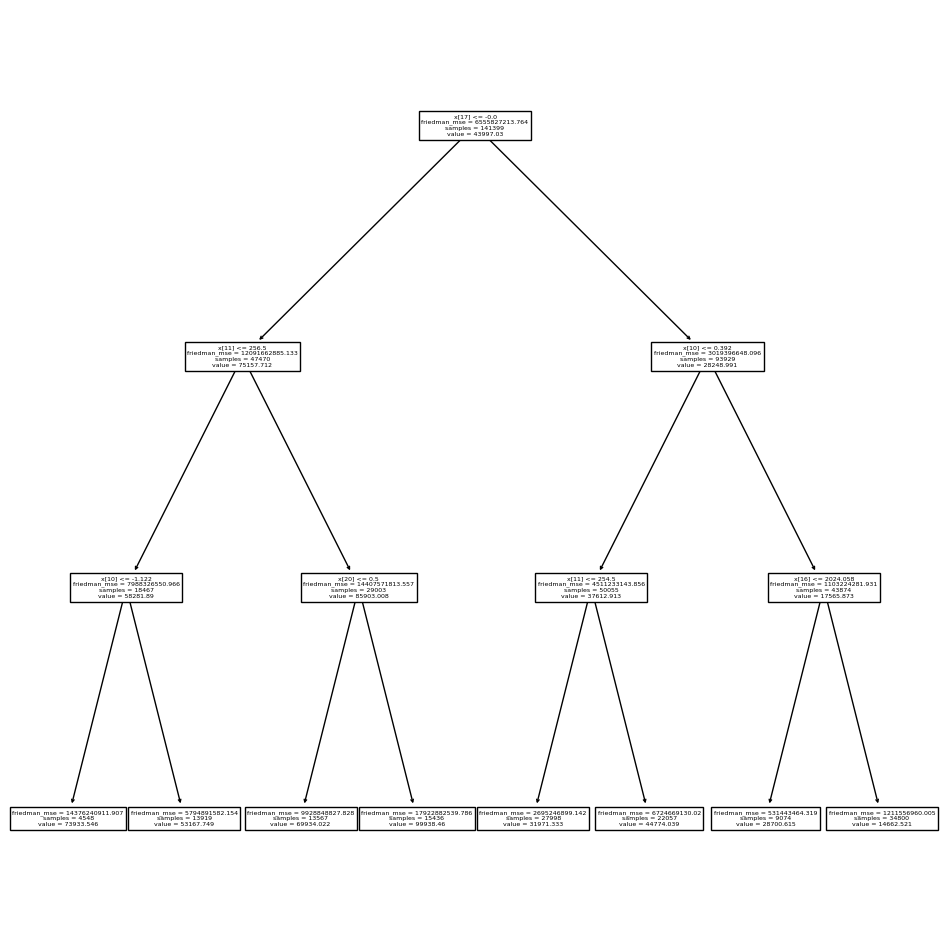

In [53]:
plt.figure(figsize=(12, 12))
plot_tree(model_fitted["DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=42)"])

## CatBoost

In [76]:
cat_df = train.select_dtypes('object')
cat_df.columns

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col'],
      dtype='object')

In [77]:
cat_cols = []
for col in cat_df.columns:
    cat_cols.append(col)
    
cat_cols

['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']

In [78]:
params = {
    'iterations': 179,
    'depth': 5,
    'learning_rate': 0.17338474251588606,
    'random_strength': 1.0456923128361446e-06,
    'bagging_temperature': 0.7194506318184232,
    'border_count': 247,
    'l2_leaf_reg': 18.037542579305022,
    'verbose': 200,
    'loss_function': 'RMSE',
    'cat_features': cat_cols
}

In [79]:
X = train.drop('price', axis=1)
y = train['price']

In [80]:
rmse = []

kf = KFold(n_splits=5, shuffle=True)
test_pool = Pool(test, cat_features=cat_cols)

for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    cbc = CatBoostRegressor(**params)

    train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    cbc.fit(train_pool)
    models.append(cbc)
    data.append(test_pool)

    predict_pool = Pool(X_test, cat_features=cat_cols)
    predictions = cbc.predict(predict_pool)
    rmse_score = mean_squared_error(y_test, predictions, squared=False)
    rmse.append(rmse_score)

print(f"Average rmse: {sum(rmse) / len(rmse):.4f}")

[     1      2      3 ... 188529 188531 188532]
[     0     13     21 ... 188526 188528 188530]
0:	learn: 77244.6637992	total: 144ms	remaining: 2m 24s
200:	learn: 72061.7726558	total: 19.5s	remaining: 1m 17s
400:	learn: 71538.6219261	total: 38.3s	remaining: 57.2s
600:	learn: 71112.2984771	total: 58s	remaining: 38.5s
800:	learn: 70784.5976981	total: 1m 19s	remaining: 19.7s
999:	learn: 70407.7114333	total: 1m 39s	remaining: 0us
[     0      1      3 ... 188529 188530 188532]
[     2      9     14 ... 188513 188515 188531]
0:	learn: 76596.8862525	total: 137ms	remaining: 2m 16s
200:	learn: 71570.5985409	total: 20s	remaining: 1m 19s
400:	learn: 71186.7150510	total: 39.6s	remaining: 59.1s
600:	learn: 70936.3649289	total: 57.5s	remaining: 38.2s
800:	learn: 70682.6486139	total: 1m 15s	remaining: 18.8s
999:	learn: 70341.7348713	total: 1m 34s	remaining: 0us
[     0      2      3 ... 188530 188531 188532]
[     1      6      8 ... 188522 188523 188527]
0:	learn: 77292.4784325	total: 177ms	remaini

## LightGBM

In [82]:
lgb_params = {
    'n_estimators': 894,
    'num_leaves': 181,
    'max_depth': 21,
    'cat_smooth': 111,
    'learning_rate': 0.004473302167663609,
    'subsample': 0.6288441012417281,
    'colsample_bytree': 0.5025875081271391,
    'min_split_gain': 0.33256130965761277,
    'min_child_weight': 60,
    'lambda_l2': 1.346095691887569e-10,
    'lambda_l1': 0.0011819375470253472,
    'max_bin': 706
}

In [83]:
X = df_train_full_encoded.drop('price', axis=1)
y = df_train_full_encoded['price']

In [84]:
rmse = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = LGBMRegressor(**lgb_params)

    clf.fit(X_train, y_train)
    models.append(clf)
    data.append(df_test_full_encoded)

    predictions = clf.predict(X_test)
    rmse_score = mean_squared_error(y_test, predictions, squared=False)
    rmse.append(rmse_score)

print(f"Average rmse: {sum(rmse) / len(rmse):.4f}")

[     0      1      2 ... 188530 188531 188532]
[    10     17     20 ... 188509 188515 188522]
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2638
[LightGBM] [Info] Number of data points in the train set: 150826, numb

In [34]:
predictions = clf.predict(df_test_full_encoded)
predictions

array([18283.7804477 , 87915.65484627, 55396.91826608, ...,
       23641.30125655, 15930.00212439, 35544.44000911])

## XGBoost

In [88]:
params =  {
    'n_estimators': 387,
    'max_depth': 6,
    'learning_rate': 0.0221955891150421,
    'subsample': 0.956049799110561,
    'colsample_bytree': 0.6020390043948215,
    'gamma': 5.356447556257337e-08,
    'min_child_weight': 6,
    'reg_alpha': 1.282064019440197e-05,
    'reg_lambda': 5.1415598885152124e-05
}

In [91]:
X = df_train_full_encoded.drop('price', axis=1)
y = df_train_full_encoded['price']

In [92]:
rmse = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb = XGBRegressor(**params)

    xgb.fit(X_train, y_train)
    models.append(xgb)
    data.append(df_test_full_encoded)

    predictions = xgb.predict(X_test)
    rmse_score = mean_squared_error(y_test, predictions, squared=False)
    rmse.append(rmse_score)

print(f"Average rmse: {sum(rmse) / len(rmse):.4f}")

[     1      2      3 ... 188528 188529 188532]
[     0     17     23 ... 188526 188530 188531]
[     0      1      2 ... 188530 188531 188532]
[     3     13     22 ... 188509 188512 188516]
[     0      2      3 ... 188529 188530 188531]
[     1      7     12 ... 188519 188527 188532]
[     0      1      2 ... 188530 188531 188532]
[     4     10     11 ... 188525 188528 188529]
[     0      1      3 ... 188530 188531 188532]
[     2      5      6 ... 188510 188523 188524]
Average rmse: 72803.1113


In [93]:
models

 LGBMRegressor(cat_smooth=111, colsample_bytree=0.5025875081271391,
               lambda_l1=0.0011819375470253472, lambda_l2=1.346095691887569e-10,
               learning_rate=0.004473302167663609, max_bin=706, max_depth=21,
               min_child_weight=60, min_split_gain=0.33256130965761277,
               n_estimators=894, num_leaves=181, subsample=0.6288441012417281),
 LGBMRegressor(cat_smooth=111, colsample_bytree=0.5025875081271391,
               lambda_l1=0.0011819375470253472, lambda_l2=1.346095691887569e-10,
               learning_rate=0.004473302167663609, max_bin=706, max_depth=21,
               min_child_weight=60, min_split_gain=0.33256130965761277,
               n_estimators=894, num_leaves=181, subsample=0.6288441012417281),
 LGBMRegressor(cat_smooth=111, colsample_bytree=0.5025875081271391,
               lambda_l1=0.0011819375470253472, lambda_l2=1.346095691887569e-10,
               learning_rate=0.004473302167663609, max_bin=706, max_depth=21,
               

## Together

In [94]:
def predict_ensemble(models, test_data):
    predictions = [models[i].predict(test_data[i]) for i in range(len(models))]
    final_predictions = np.mean(predictions, axis=0)
    return final_predictions

In [95]:
final_predictions = predict_proba_ensemble(models, data)
final_predictions

[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] la

array([18189.90318201, 82118.2256802 , 56894.29485528, ...,
       22244.1437404 , 16552.45500146, 36438.17300074])

In [100]:
def predict_weight_ensemble(models, test_data, weights):
    # Предсказания для каждого типа моделей
    cat_preds = np.mean([models[i].predict(test_data[i]) for i in range(5)], axis=0)
    lgb_preds = np.mean([models[i].predict(test_data[i]) for i in range(5, 10)], axis=0)
    xgb_preds = np.mean([models[i].predict(test_data[i]) for i in range(10, 15)], axis=0)
    
    # Взвешенная сумма предсказаний
    final_predictions = (
        cat_preds * weights['cat'] +
        lgb_preds * weights['lgb'] +
        xgb_preds * weights['xgb']
    )
    
    return final_predictions

weights = {
    'cat': 0.1,
    'lgb': 0.6,
    'xgb': 0.3
}

final_predictions = predict_proba_ensemble(models, data, weights)
final_predictions

[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] lambda_l1 is set=0.0011819375470253472, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011819375470253472
[LightGBM] [Warning] lambda_l2 is set=1.346095691887569e-10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.346095691887569e-10
[LightGBM] [Warning] la

array([18413.49940199, 83153.9675212 , 56520.6576592 , ...,
       22402.4061921 , 16637.10661832, 36975.71647351])

# Submission

In [101]:
sample_df = pd.read_csv("/kaggle/input/playground-series-s4e9/sample_submission.csv")
sample_df

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016
...,...,...
125685,314218,43878.016
125686,314219,43878.016
125687,314220,43878.016
125688,314221,43878.016


In [102]:
sample_df['price'] = final_predictions
sample_df

,id,price
0,188533,18413.499402
1,188534,83153.967521
2,188535,56520.657659
3,188536,24795.458180
4,188537,30779.696290
...,...,...
125685,314218,27803.042611
125686,314219,49490.604989
125687,314220,22402.406192
125688,314221,16637.106618


In [103]:
sample_df.to_csv("submission.csv", index=False)